In [1]:
# imports 
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

ModuleNotFoundError: No module named 'plotly'

# Import

---



In [ ]:
# data
t1 = time.time()
df = pd.read_csv('/content/human-activity-recognition.csv')
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

Elapsed time [s]: 0.6554


# Summary

---



In [ ]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [ ]:
# dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


# Visualization

---



## Activity groups & count

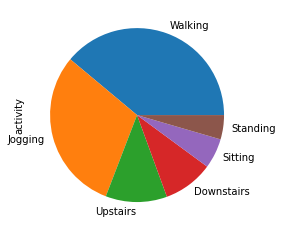

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64


In [ ]:
# activities
activity_stats = df.activity.value_counts()
activity_stats.plot(kind='pie')

plt.show()
print(activity_stats)

In [ ]:
# activity vs. user
pd.crosstab(df.user, df.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257
6,1431,10961,1679,709,1661,12262
7,2257,9183,2529,2364,3601,11033
8,3345,10313,2699,3269,4453,17108
9,0,0,0,0,0,12923


## Axial vibrration in respect of time per activity of a specific user

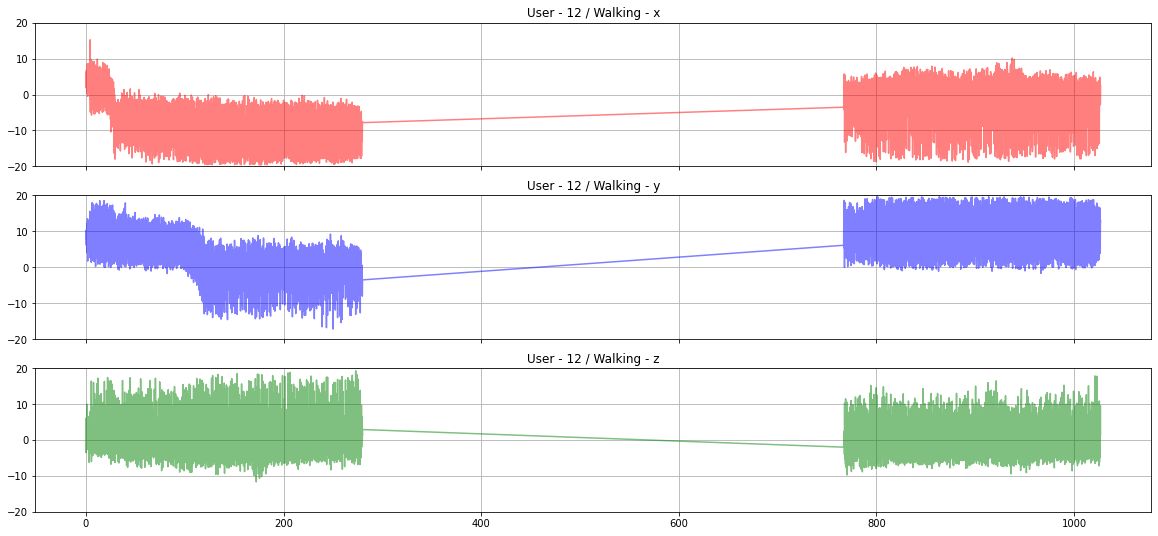

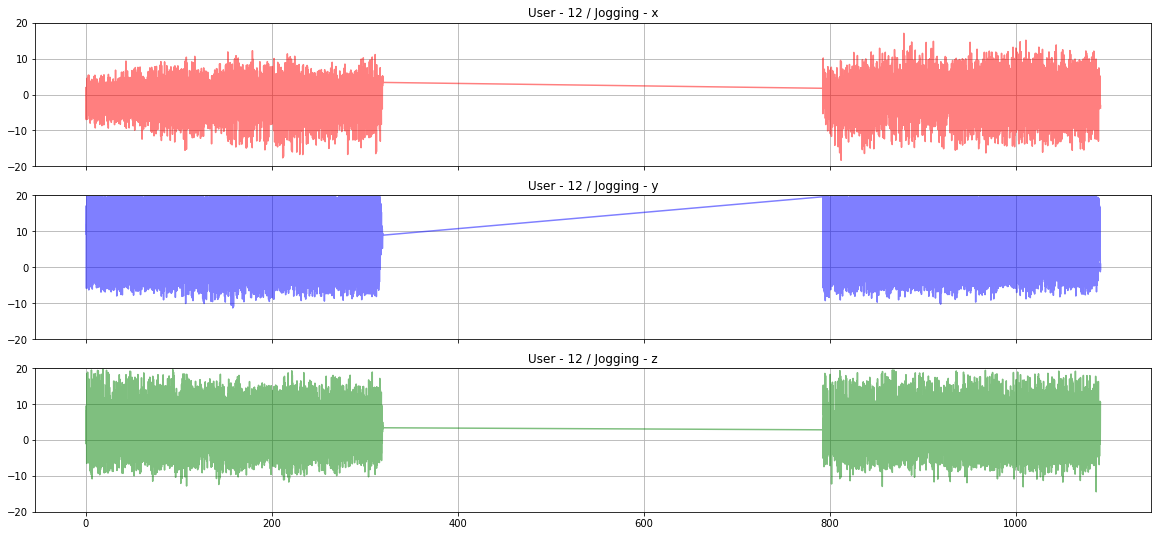

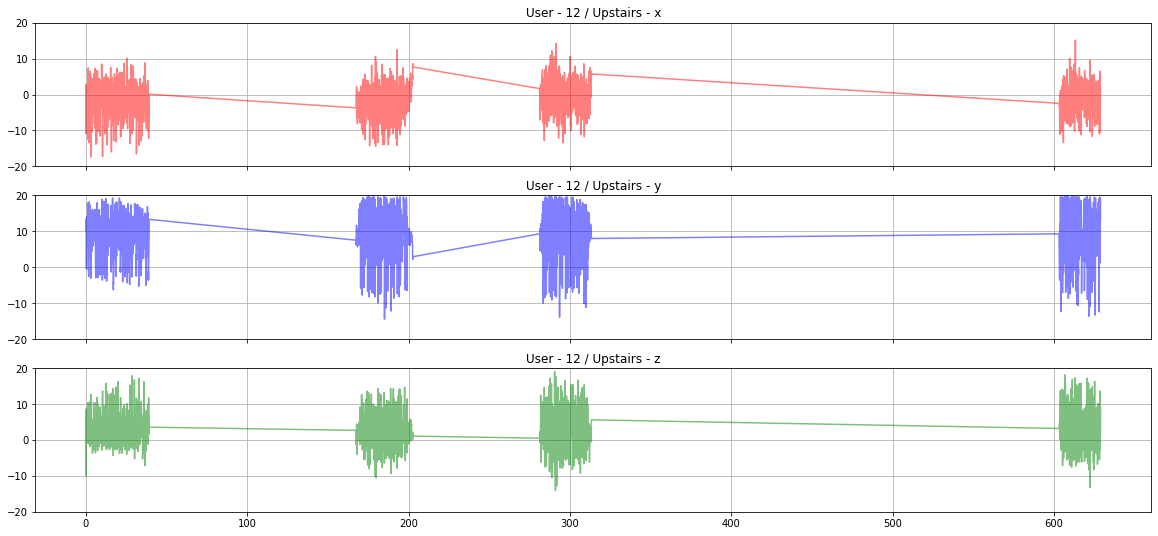

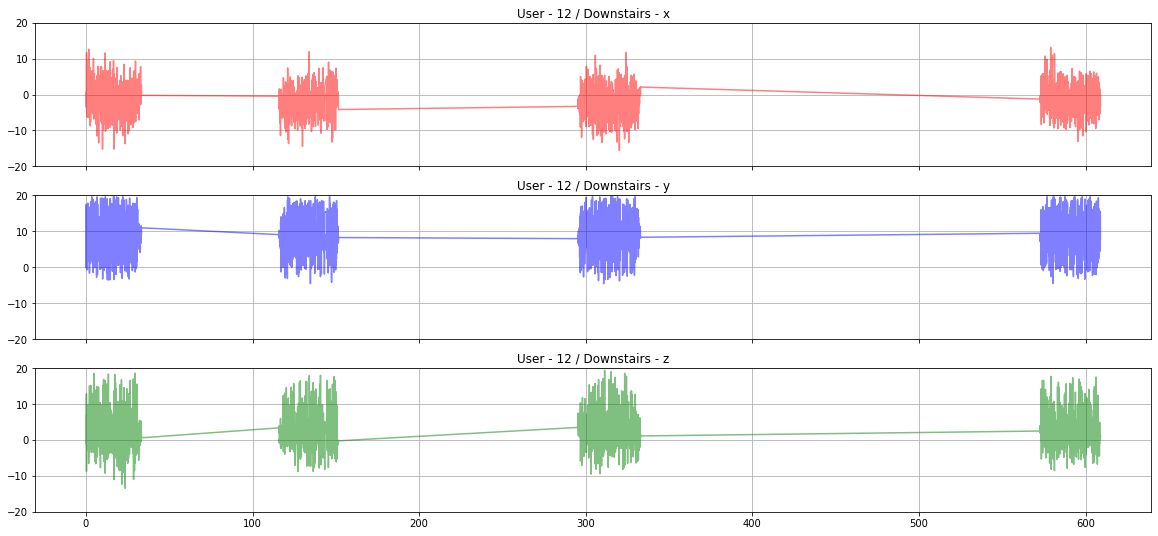

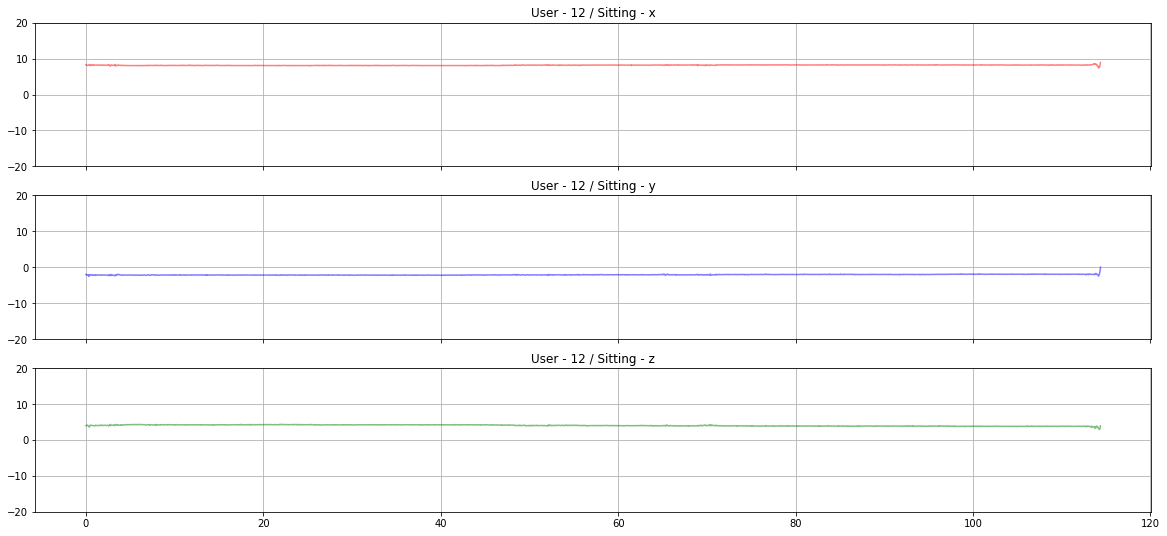

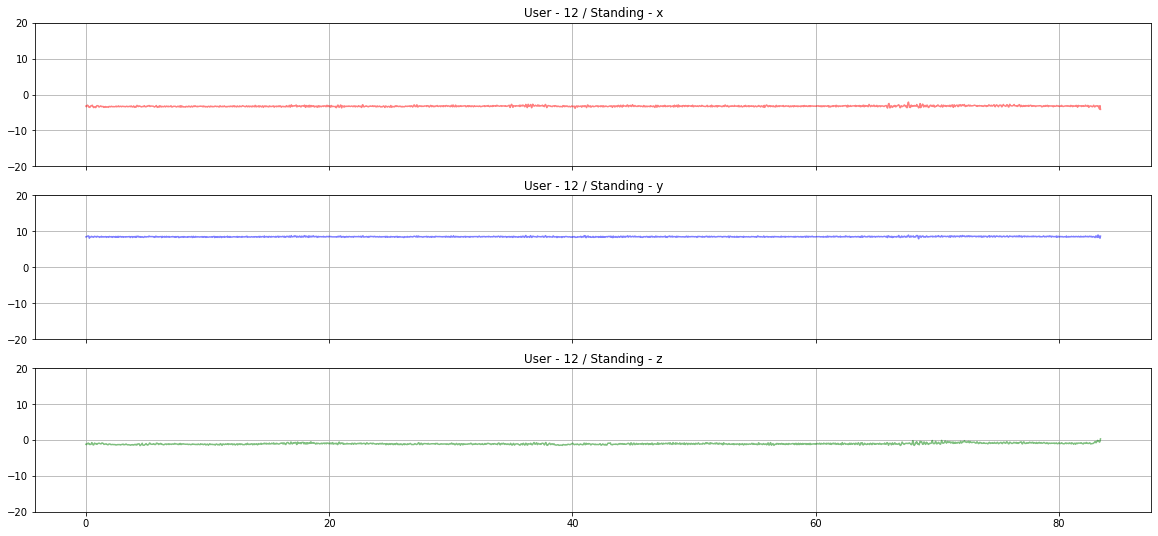

In [72]:
# select user
sel_user = 12
df_user = df[df.user==sel_user]

# time series plots
activities = activity_stats.index.tolist()
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,9), sharex=True)
    
    ax1.plot(df_temp['time_sec'], df_temp['x-axis'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('User - ' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(df_temp['time_sec'], df_temp['y-axis'], color='blue', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('User - ' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(df_temp['time_sec'], df_temp['z-axis'], color='green', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title('User - ' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

## Status from mean standard deviation of a specific user

In [ ]:
stats_by_act = df_user.groupby('activity')[['x-axis','y-axis','z-axis']].std()
stats_by_act

,x-axis,y-axis,z-axis
activity,,,
Downstairs,3.813784,5.480537,4.657947
Jogging,4.697883,9.029028,5.973334
Sitting,0.082567,0.110156,0.180823
Standing,0.164014,0.101152,0.209951
Upstairs,4.230080,6.769147,4.746736
Walking,6.230321,6.184085,4.779270


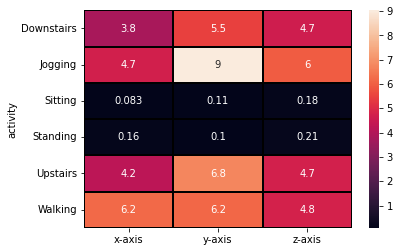

In [ ]:
# visual version
sns.heatmap(stats_by_act, annot=True, linewidths=1, linecolor='black')
plt.show()

## Status from mean standard deviation of whole dataset

In [ ]:
stats_full = df.groupby(['activity','user'], as_index=False)[['x-axis','y-axis','z-axis']].std()

stats_full_mean_std = stats_full.groupby('activity')[['x-axis','y-axis','z-axis']].mean()
stats_full_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,4.264054,4.541456,3.240970
Jogging,8.044195,8.374622,5.585056
Sitting,0.315291,0.284248,0.288881
Standing,0.496411,0.294802,0.499241
Upstairs,4.200767,4.314794,3.116068
Walking,4.603113,4.515043,3.718029


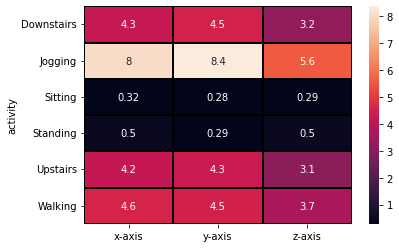

In [ ]:
# visual version
sns.heatmap(stats_full_mean_std,
            annot=True, linewidths=1, linecolor='black')
plt.show()